Classifying DNA Sequences
Presented by Eduonix
We will explore the world of bioinformatics by using Markov models, K-nearest neighbor (KNN) algorithms, support vector machines, and other common classifiers to classify short E. Coli DNA sequences. This project will use a dataset from the UCI Machine Learning Repository that has 106 DNA sequences, with 57 sequential nucleotides (“base-pairs”) each.

In [25]:
import os
import sys
import numpy as np
import pandas as pd

Step 1: Read and explore the dataset

In [26]:
#Read and explore the data
fName = 'promoters.data'
names = ['Class', 'id', 'Sequence']
data = pd.read_csv(fName, names = names)
print(data.iloc[1])
print("\n")
print(data.head(5))

Class                                                       +
id                                                       AMPC
Sequence    \t\ttgctatcctgacagttgtcacgctgattggtgtcgttacaat...
Name: 1, dtype: object


  Class         id                                           Sequence
0     +        S10  \t\ttactagcaatacgcttgcgttcggtggttaagtatgtataat...
1     +       AMPC  \t\ttgctatcctgacagttgtcacgctgattggtgtcgttacaat...
2     +       AROH  \t\tgtactagagaactagtgcattagcttatttttttgttatcat...
3     +      DEOP2  \taattgtgatgtgtatcgaagtgtgttgcggagtagatgttagaa...
4     +  LEU1_TRNA  \ttcgataattaactattgacgaaaagctgaaaaccactagaatgc...


Step 2: Preprocess the dataset

In [27]:
#Build the dataset by creating custom dataframes
classes = data.loc[:,'Class']
sequences = list(data.loc[:,'Sequence'])
print(len(sequences))
print(sequences[1])
dataset = {}
#Loop through sequences and split into individual nucleotides
for i,seq in enumerate(sequences):
     nucleotides = list(seq)
     nucleotides = [x for x in nucleotides if x != '\t']
     nucleotides.append(classes[i])
     dataset[i] = nucleotides
print(dataset[0])
print("\n")
print(len(dataset[0]))
#Turn the dataset into a dataframe
data = pd.DataFrame(dataset)
print(data.info())
print(data.head(5))

106
		tgctatcctgacagttgtcacgctgattggtgtcgttacaatctaacgcatcgccaa
['t', 'a', 'c', 't', 'a', 'g', 'c', 'a', 'a', 't', 'a', 'c', 'g', 'c', 't', 't', 'g', 'c', 'g', 't', 't', 'c', 'g', 'g', 't', 'g', 'g', 't', 't', 'a', 'a', 'g', 't', 'a', 't', 'g', 't', 'a', 't', 'a', 'a', 't', 'g', 'c', 'g', 'c', 'g', 'g', 'g', 'c', 't', 't', 'g', 't', 'c', 'g', 't', '+']


58
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Columns: 106 entries, 0 to 105
dtypes: object(106)
memory usage: 48.1+ KB
None
  0   1   2   3   4   5   6   7   8   9   ... 96  97  98  99  100 101 102 103  \
0   t   t   g   a   t   a   c   t   c   t ...   c   c   t   a   g   c   g   c   
1   a   g   t   a   c   g   a   t   g   t ...   c   g   a   g   a   c   t   g   
2   c   c   a   t   g   g   g   t   a   t ...   g   c   t   a   g   t   a   c   
3   t   t   c   t   a   g   g   c   c   t ...   a   t   g   g   a   c   t   g   
4   a   a   t   g   t   g   g   t   t   a ...   g   a   a   g   g   a   t   a   

  10

In [28]:
#Transpose the dataframe and rename the columns
data = data.transpose()
data.rename(columns = {57: 'Class'}, inplace = True) 
print(data.head(5))

   0  1  2  3  4  5  6  7  8  9  ...  48 49 50 51 52 53 54 55 56 Class
0  t  a  c  t  a  g  c  a  a  t  ...   g  c  t  t  g  t  c  g  t     +
1  t  g  c  t  a  t  c  c  t  g  ...   c  a  t  c  g  c  c  a  a     +
2  g  t  a  c  t  a  g  a  g  a  ...   c  a  c  c  c  g  g  c  g     +
3  a  a  t  t  g  t  g  a  t  g  ...   a  a  c  a  a  a  c  t  c     +
4  t  c  g  a  t  a  a  t  t  a  ...   c  c  g  t  g  g  t  a  g     +

[5 rows x 58 columns]


In [29]:
#Run this if you want to record the value counts for each sequence
"""
series = []
for name in data.columns:
    series.append(data[name].value_counts())
    
info = pd.DataFrame(series)
details = info.transpose()
print(details)
"""

'\nseries = []\nfor name in data.columns:\n    series.append(data[name].value_counts())\n    \ninfo = pd.DataFrame(series)\ndetails = info.transpose()\nprint(details)\n'

In [30]:
#We need to convert the string sequences to one-hot encoding format
data = pd.get_dummies(data)
#print(DF.info())
#print(DF.head(n = 5))
data.drop(columns = ['Class_-'],inplace = True)
data.rename(columns = {'Class_+':'Class'},inplace = True)
print(data.info())
print("\n")
print(data.head(n = 5))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106 entries, 0 to 105
Columns: 229 entries, 0_a to Class
dtypes: uint8(229)
memory usage: 24.5 KB
None


   0_a  0_c  0_g  0_t  1_a  1_c  1_g  1_t  2_a  2_c  ...    54_t  55_a  55_c  \
0    0    0    0    1    1    0    0    0    0    1  ...       0     0     0   
1    0    0    0    1    0    0    1    0    0    1  ...       0     1     0   
2    0    0    1    0    0    0    0    1    1    0  ...       0     0     1   
3    1    0    0    0    1    0    0    0    0    0  ...       0     0     0   
4    0    0    0    1    0    1    0    0    0    0  ...       1     1     0   

   55_g  55_t  56_a  56_c  56_g  56_t  Class  
0     1     0     0     0     0     1      1  
1     0     0     1     0     0     0      1  
2     0     0     0     0     1     0      1  
3     0     1     0     1     0     0      1  
4     0     0     0     0     1     0      1  

[5 rows x 229 columns]


In [32]:
#Prepare the data for training and testing
from sklearn.model_selection import train_test_split
X = np.array(data.drop(['Class'],1))
Y = np.array(data['Class'])
#Define the seed for reproducibility
seed = 42
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=seed)

Step 3: Training and Testing the Classification Algorithms
Now that we have preprocessed the data and built our training and testing datasets, we can start to deploy different classification algorithms. It's relatively easy to test multiple models; as a result, we will compare and contrast the performance of ten different algorithms.

In [33]:
#Choose a few models
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import fbeta_score,accuracy_score
gnb = GaussianNB()
dt = DecisionTreeClassifier(random_state=0)
rfc = RandomForestClassifier(random_state=42, n_jobs=2)
knn = KNeighborsClassifier(n_jobs=2)
lreg = LogisticRegression(random_state=42)
lsvc = LinearSVC(random_state=42)
gdb = GradientBoostingClassifier(random_state=42)
classifiersList = [gnb,dt,rfc,knn,lsvc,lreg,gdb]
classifiersScores = []
classifiersTrainTimes = []

In [36]:
#Train the models
from time import time
print(set(Y_train))
def trainPredict(model,sampleSize,x_train,y_train,x_test,y_test):
    '''
    model: The algorithm
    sampleSize: The size of samples to draw from
    x_train: Training dataset
    y_train: Labels 
    x_test: Test set
    y_test: Test labels
    '''
    results = {}
    #Training the model 
    start = time()
    learner = model.fit(x_train[:sampleSize],y_train[:sampleSize])
    end = time()
    results['training_time'] = end - start
    
    #Predictions 
    start = time()
    predictions_test = learner.predict(x_test)
    end = time()
    results['testing_time'] = end - start
    results['acc_train'] = accuracy_score(y_test,learner.predict(x_test))
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=0.5)
    print ("{} trained on {} samples.".format(model.__class__.__name__, sampleSize))
    results['clf_name'] = model.__class__.__name__
    return results

#Create lists to store selected benchmarking results
clf_lscores = []
clf_ltrain_times = []
clf_lnames = []
clf_testAccuracies = []
clf_trainAccuracies = []

for model in classifiersList:
    #Train the various models on the same set of data to compare and choose the best model
    clfResults = trainPredict(model,len(Y_train),X_train,Y_train,X_test,Y_test)
    clf_lscores.append(clfResults['f_test'])
    clf_ltrain_times.append(clfResults['training_time'])
    clf_testAccuracies.append(clfResults['acc_test'])
    clf_trainAccuracies.append(clfResults['acc_train'])
    clf_lnames.append(clfResults['clf_name'].replace('Classifier', ''))
print(clf_lscores)
print(clf_ltrain_times)
print(clf_testAccuracies)
print(clf_lnames)

{0, 1}
GaussianNB trained on 79 samples.
DecisionTreeClassifier trained on 79 samples.
RandomForestClassifier trained on 79 samples.
KNeighborsClassifier trained on 79 samples.
LinearSVC trained on 79 samples.
LogisticRegression trained on 79 samples.
GradientBoostingClassifier trained on 79 samples.
[0.9701492537313434, 0.7368421052631579, 0.9493670886075949, 0.7142857142857143, 0.8241758241758242, 0.8620689655172415, 0.7281553398058251]
[0.07536697387695312, 0.07275986671447754, 0.47166872024536133, 0.05455493927001953, 0.002510547637939453, 0.04543256759643555, 0.24422264099121094]
[0.9259259259259259, 0.7407407407407407, 0.9629629629629629, 0.7037037037037037, 0.8518518518518519, 0.8888888888888888, 0.7407407407407407]
['GaussianNB', 'DecisionTree', 'RandomForest', 'KNeighbors', 'LinearSVC', 'LogisticRegression', 'GradientBoosting']


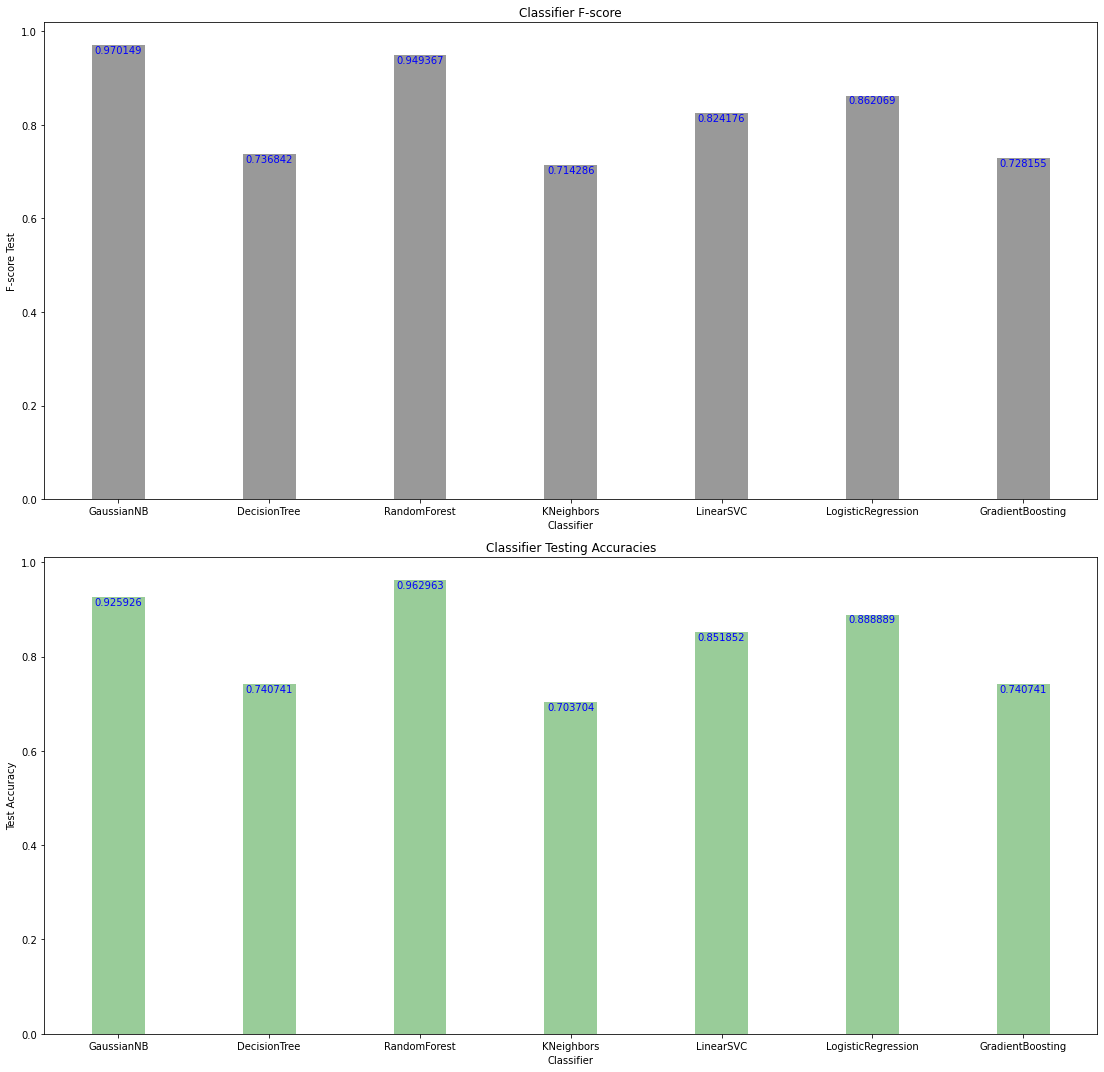

In [38]:
#Plot the results
import matplotlib.pyplot as plt
plt.figure(1,figsize = (45,15))
nGroups = len(clf_lscores)
index = np.arange(nGroups)
barWidth = 0.35
opacity = 0.4
data1 = clf_lscores
data2 = clf_testAccuracies 
plt.subplot(2,3,1)
plt.xlabel('Classifier')
plt.ylabel('F-score Test')
plt.title('Classifier F-score')
plt.xticks(index, clf_lnames)
bar1 = plt.bar(index, data1, barWidth, alpha=opacity, color='k')
for rect in bar1:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%f' % height, ha='center', va='top',color = 'b')
plt.subplot(2,3,4)
plt.xlabel('Classifier')
plt.ylabel('Test Accuracy')
plt.title('Classifier Testing Accuracies')
plt.xticks(index, clf_lnames)
bar2 = plt.bar(index, data2, barWidth, alpha=opacity, color='g')
for rect in bar2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%f' % height, ha='center', va='top',color = 'b')
plt.tight_layout()
plt.show()